# Assignment 1

## 1 Plot data

c:\Users\Lenovo\miniconda3\envs\playground\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


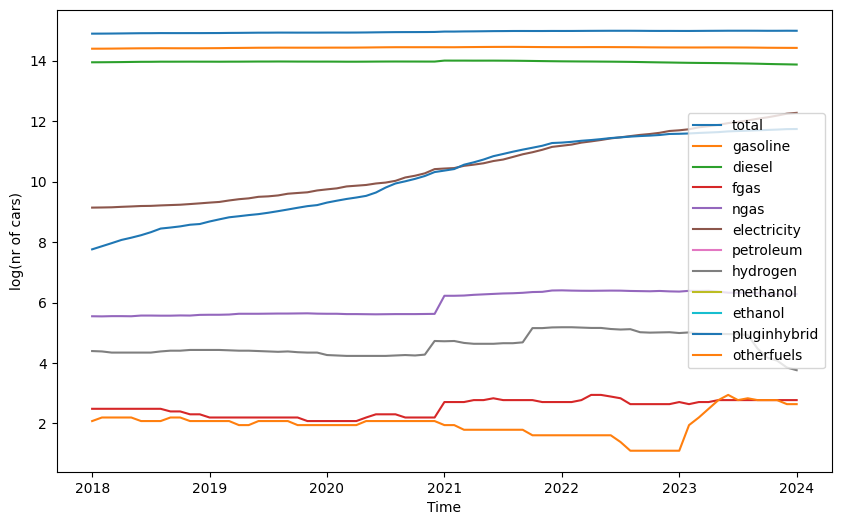

[2018.         2018.08333333 2018.16666667 2018.25       2018.33333333
 2018.41666667 2018.5        2018.58333333 2018.66666667 2018.75
 2018.83333333 2018.91666667 2019.         2019.08333333 2019.16666667
 2019.25       2019.33333333 2019.41666667 2019.5        2019.58333333
 2019.66666667 2019.75       2019.83333333 2019.91666667 2020.
 2020.08333333 2020.16666667 2020.25       2020.33333333 2020.41666667
 2020.5        2020.58333333 2020.66666667 2020.75       2020.83333333
 2020.91666667 2021.         2021.08333333 2021.16666667 2021.25
 2021.33333333 2021.41666667 2021.5        2021.58333333 2021.66666667
 2021.75       2021.83333333 2021.91666667 2022.         2022.08333333
 2022.16666667 2022.25       2022.33333333 2022.41666667 2022.5
 2022.58333333 2022.66666667 2022.75       2022.83333333 2022.91666667
 2023.         2023.08333333 2023.16666667 2023.25       2023.33333333
 2023.41666667 2023.5        2023.58333333 2023.66666667 2023.75
 2023.83333333 2023.91666667 2024.     

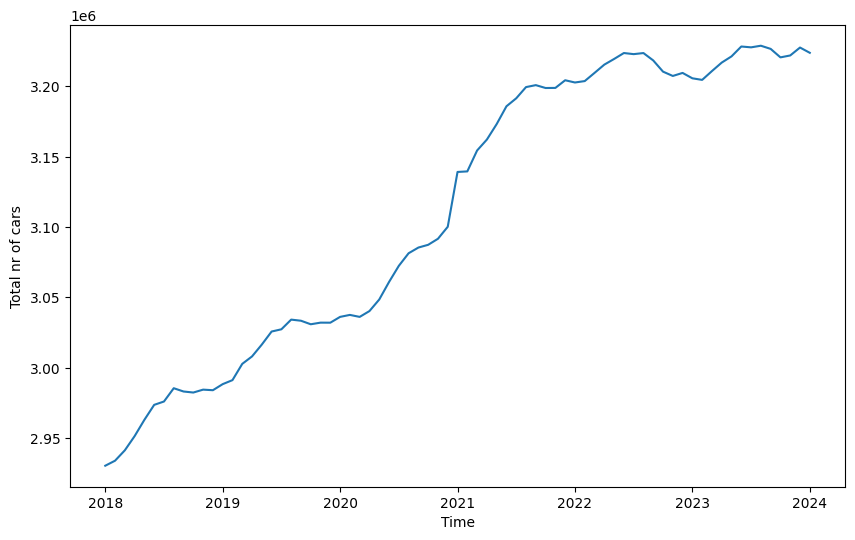

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

df = pd.read_csv('DST_BIL54.csv')

n = len(df)

labels = df.columns[1:]

time = np.arange(2018, 2018+n/12, 1/12)

df['time'] = time

#split into test and train
train = df[df['time'] < 2024]
test = df[df['time'] >= 2024]


plt.figure(figsize=(10, 6))
#plot the data
for label in labels:
    plt.plot(train['time'], np.log(train[label]), label=label)
plt.xlabel('Time')
plt.ylabel('log(nr of cars)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(train['time'], train['total'])
plt.xlabel('Time')
plt.ylabel('Total nr of cars')


print(time)

## 2 Linear trend model

### 2.1

$Y = \theta \cdot X + \epsilon$

$ \begin{bmatrix}
2930483 \\
2934044 \\
2941422 
\end{bmatrix} = \begin{bmatrix}
1 & 2018 \\
1 & 2018.083 \\
1 & 2018.166 
\end{bmatrix} \cdot \begin{bmatrix}
\theta _1 \\
\theta _2 
\end{bmatrix} + \epsilon$


### 2.2, 2.3 and 2.4

Theta_0:  -108811321.71761814
Theta_0 standard error:  3607194.068641336
Theta_1:  55380.136616120675
Theta_1 standard error:  1784.8553721482665
           Time  Total prediction  Total actual  95% CI lower bound  \
0   2024.083333           3282689       3223805             3227154   
1   2024.166667           3287304       3231177             3231769   
2   2024.250000           3291919       3237629             3236384   
3   2024.333333           3296534       3244611             3240999   
4   2024.416667           3301149       3255073             3245614   
5   2024.500000           3305764       3254569             3250229   
6   2024.583333           3310379       3258060             3254844   
7   2024.666667           3314994       3256515             3259459   
8   2024.750000           3319609       3252275             3264074   
9   2024.833333           3324224       3253059             3268689   
10  2024.916667           3328839       3258025             3273304   

 

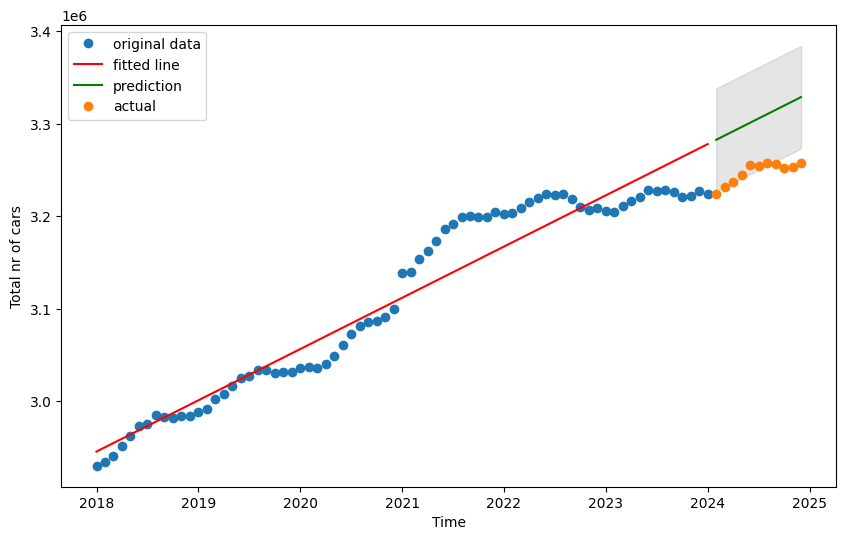

In [17]:
# estimate the trend

N = len(train)

x = np.array([np.ones(N),np.array(train['time'])]).T
y = np.array(train['total'])

x_future = np.array([np.ones(len(test)),np.array(test['time'])]).T
y_future = np.array(test['total'])


reg = LinearRegression(fit_intercept=False)
reg.fit(x, y)
#sigma_hat^2
var = sum((y - reg.predict(x))**2)/(N-2)
theta_var = np.linalg.inv(x.T@x)*var
standard_error = np.sqrt(np.diag(theta_var))

print("Theta_0: ", reg.coef_[0])
print("Theta_0 standard error: ", standard_error[0])
print("Theta_1: ", reg.coef_[1])
print("Theta_1 standard error: ", standard_error[1])


alpha = 0.05
dof = N-2
t_val = stats.t.isf(alpha/2, dof)

prediction_interval = []

for x_next in x_future:
    err_var = var + x_next.T @ theta_var @ x_next
    confidence = t_val*np.sqrt(err_var)
    prediction_interval.append(err_var)

prediction_interval = np.array(prediction_interval)



plt.figure(figsize=(10, 6))
plt.plot(x[:,1], y, 'o', label='original data')
plt.plot(x[:,1], (x@reg.coef_.T), 'r', label='fitted line')


prediction = x_future@reg.coef_.T
plt.plot(x_future[:,1], prediction, 'g', label='prediction')
plt.plot(x_future[:,1], y_future, 'o', label='actual')
plt.fill_between(x_future[:,1], prediction-confidence, prediction+confidence, color='gray', alpha=0.2)

plt.xlabel('Time')
plt.ylabel('Total nr of cars')
plt.legend()

df = pd.DataFrame(x_future[:,1], columns=["Time"])
df['Total prediction'] = np.array(prediction, dtype=int)
df['Total actual'] = np.array(y_future, dtype=int)
df['95% CI lower bound'] = np.array(prediction-confidence, dtype=int)
df['95% CI upper bound'] = np.array(prediction+confidence, dtype=int)

print(df)




### 2.5

### 2.6

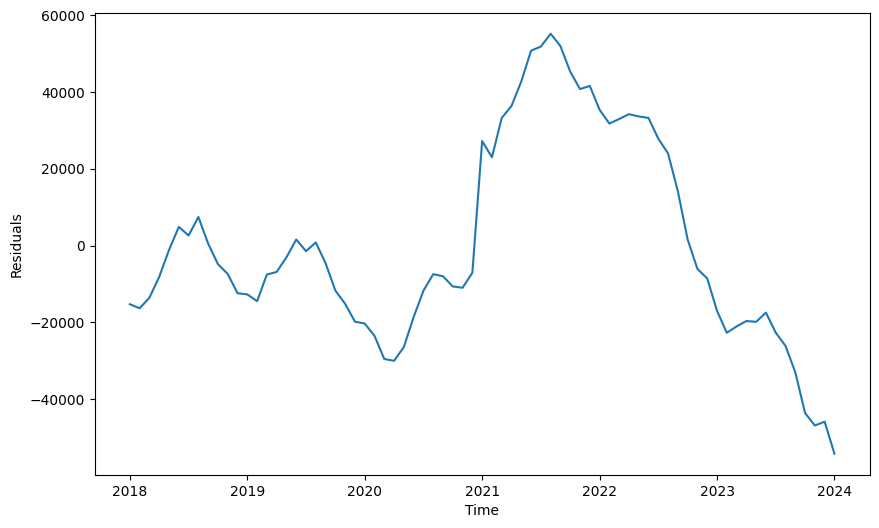

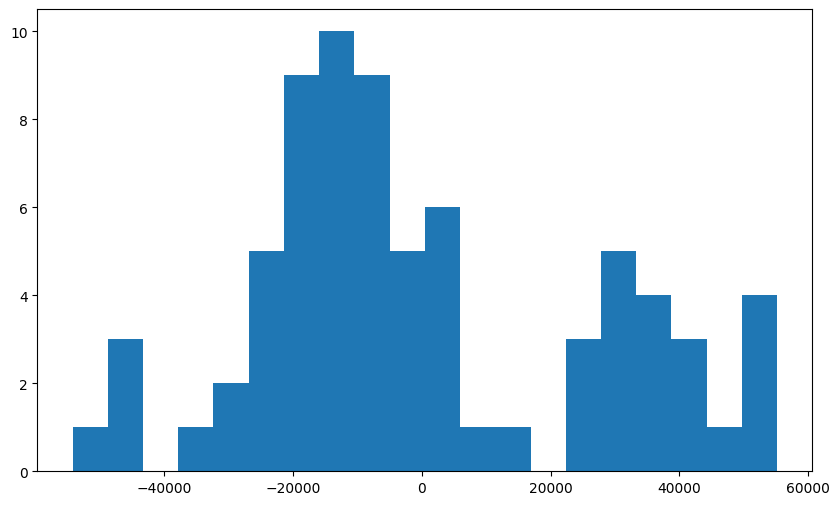

[[ 3301773.46552063  3529068.40360977  2933236.76896665 ...
  10119210.27862995  9902271.33151384 11704008.79187655]
 [ 3529068.40360977  3772010.38393861  3135161.54568598 ...
  10815819.32761857 10583946.24735589 12509715.77981033]
 [ 2933236.76896665  3135161.54568598  2605835.32839714 ...
   8989726.27048546  8797001.57179038 10397633.05724789]
 ...
 [10119210.27862995 10815819.32761857  8989726.27048546 ...
  31013156.33323855 30348286.12139124 35870215.5991969 ]
 [ 9902271.33151384 10583946.24735589  8797001.57179038 ...
  30348286.12139124 29697669.61509559 35101218.1586208 ]
 [11704008.79187655 12509715.77981033 10397633.05724789 ...
  35870215.5991969  35101218.1586208  41487952.8322588 ]]


<Figure size 1000x600 with 0 Axes>

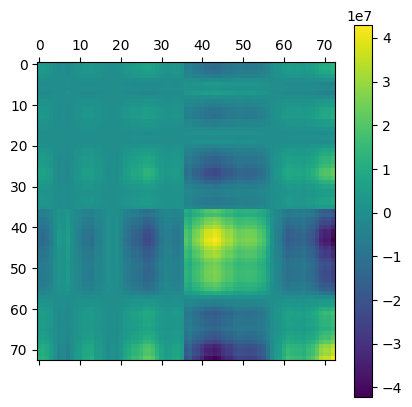

In [29]:
residuals = y - x@reg.coef_.T
plt.figure(figsize=(10, 6))
# as bars
plt.plot(x[:,1], residuals)
plt.xlabel('Time')
plt.ylabel('Residuals')

plt.show()

#histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20)
plt.show()

residuals = residuals.reshape(-1, 1)

Sigma = (residuals @ residuals.T) / (len(residuals) - 2)
print(Sigma)

#plot residual correlation matrix
plt.figure(figsize=(10, 6))
plt.matshow(Sigma)
#add colorbar
plt.colorbar()
plt.title = "OLS residuals correlation matrix"
plt.show()


## 3 WLS - local linear trend model

### 3.1 
blabla

### 3.2 
blabla

### 3.3
sum of weights:  9.995432240925496
In OLS is equivalent to WLS with all weight being 1, so the equivalent sum of weight is N (72 in this case)




sum of weights:  9.995432240925496


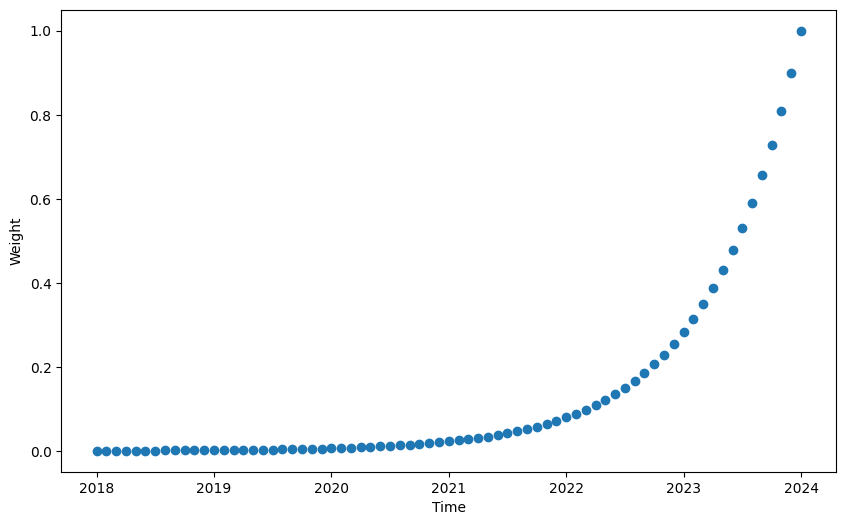

In [11]:

l = 0.9
weight = [l**(N-j-1) for j in range(N)]

print("sum of weights: ", sum(weight))


# 3.2
plt.figure(figsize=(10, 6))
plt.plot(x[:,1], weight, 'o', label='weights')
plt.xlabel('Time')
plt.ylabel('Weight')
plt.show()




### 3.4

WLS parameters: 
Theta_0:  -49037289.42900691
Theta_0 standard error:  3607194.068641336
Theta_1:  25826.229727475133
Theta_1 standard error:  1784.8553721482665


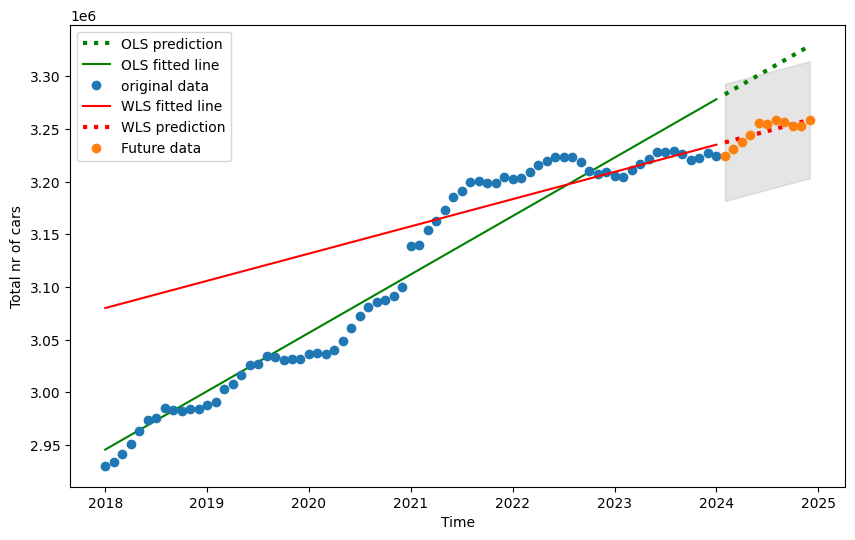

In [12]:
reg_w = LinearRegression(fit_intercept=False)
reg_w.fit(x, y, sample_weight=weight)

var = sum((y - reg.predict(x))**2)/(N-2)
theta_var = np.linalg.inv(x.T@x)*var
standard_error = np.sqrt(np.diag(theta_var))

print("WLS parameters: ")
print("Theta_0: ", reg_w.coef_[0])
print("Theta_0 standard error: ", standard_error[0])
print("Theta_1: ", reg_w.coef_[1])
print("Theta_1 standard error: ", standard_error[1])


alpha = 0.05
dof = N-2
t_val = stats.t.isf(alpha/2, dof)

prediction_interval = []

for x_next in x_future:
    err_var = var + x_next.T @ theta_var @ x_next
    confidence = t_val*np.sqrt(err_var)
    prediction_interval.append(err_var)

prediction_interval = np.array(prediction_interval)
plt.figure(figsize=(10, 6))
prediction = x_future@reg.coef_.T
plt.plot(x_future[:,1], prediction, 'g', label='OLS prediction', linestyle=':', linewidth=3)
plt.plot(x[:,1], reg.predict(x), 'g', label='OLS fitted line')


plt.plot(x[:,1], y, 'o', label='original data')
plt.plot(x[:,1], (x@reg_w.coef_.T), 'r', label='WLS fitted line')


prediction = x_future@reg_w.coef_.T
plt.plot(x_future[:,1], prediction, 'r', label='WLS prediction', linestyle=':', linewidth=3)
plt.plot(x_future[:,1], y_future, 'o', label='Future data')
plt.fill_between(x_future[:,1], prediction-confidence, prediction+confidence, color='gray', alpha=0.2)


plt.xlabel('Time')
plt.ylabel('Total nr of cars')
plt.legend()

df = pd.DataFrame(x_future[:,1], columns=["Time"])
df['Total prediction'] = np.array(prediction, dtype=int)
df['Total actual'] = np.array(y_future, dtype=int)

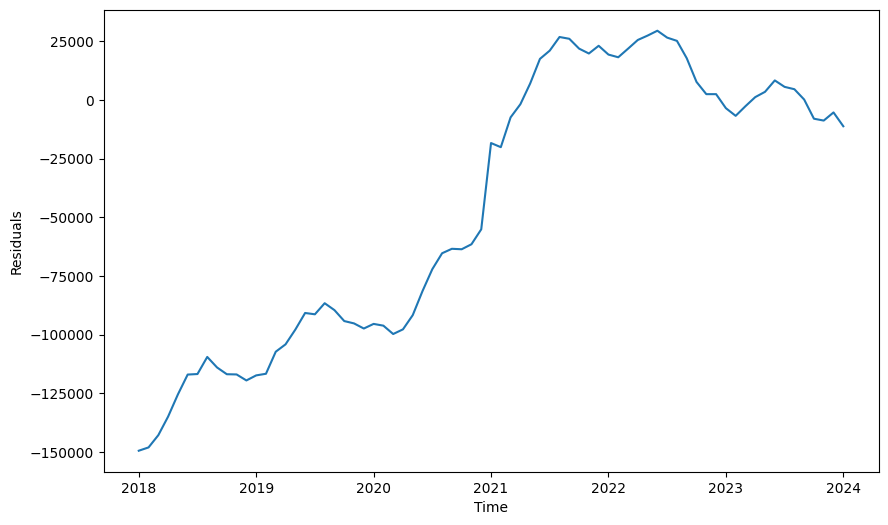

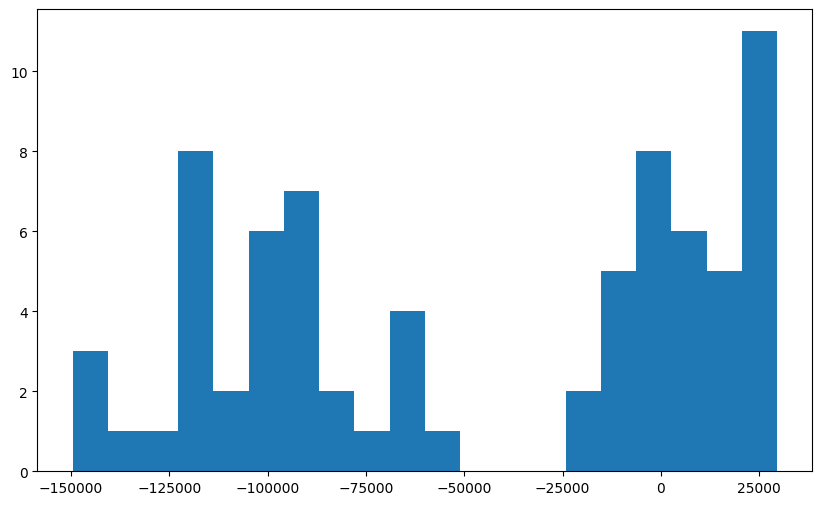

(73,)
[2930483 2934044 2941422 2951498 2963093 2973721 2976096 2985537 2983209
 2982473 2984530 2984123 2988432 2991279 3002834 3008125 3016558 3025807
 3027397 3034273 3033480 3030970 3032120 3032090 3036213 3037617 3036205
 3040346 3048560 3060994 3072466 3081409 3085458 3087414 3091698 3100222
 3139166 3139557 3154415 3162174 3173165 3185814 3191486 3199450 3200838
 3198798 3198864 3204309 3202713 3203720 3209522 3215399 3219420 3223647
 3222857 3223624 3218379 3210424 3207359 3209511 3205688 3204567 3210827
 3216852 3221263 3228278 3227684 3228835 3226588 3220559 3221920 3227541
 3223801]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
10153863286.346033


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3452\1302653609.py:20: RuntimeWarning: Degrees of freedom <= 0 for slice
  Sigma = np.cov(y.reshape(-1, 1))
c:\Users\Lenovo\miniconda3\envs\playground\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\Lenovo\miniconda3\envs\playground\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


<Figure size 1000x600 with 0 Axes>

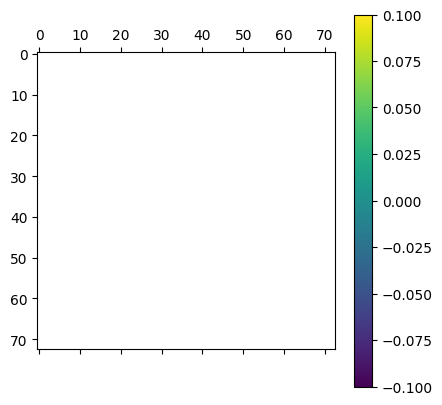

In [49]:
residuals = y - x@reg_w.coef_.T
plt.figure(figsize=(10, 6))
# as bars
plt.plot(x[:,1], residuals)
plt.xlabel('Time')
plt.ylabel('Residuals')

plt.show()

#histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20)
plt.show()

residuals = residuals.reshape(-1, 1)

#Sigma = (residuals @ residuals.T) / (len(residuals) - 2)
print(y.shape)
print(y)
Sigma = np.cov(y.reshape(-1, 1))
print(Sigma)
print(np.var(y))

#plot residual correlation matrix
plt.figure(figsize=(10, 6))
plt.matshow(Sigma)
#add colorbar
plt.colorbar()
plt.title = "OLS correlation matrix"
plt.show()


## Recursive estimation

In [13]:
#write recursive least squares algorithm, for updating R_t and theta_t

theta_hat = np.zeros((2,1))
R = np.eye(2)*0.1

T = 3

for t in range(T):
    x_t = x[t].reshape(-1, 1)
    y_t = y[t]


theta_ols = np.linalg.inv(x.T @ x) @ x.T @ y

print("OLS: ", theta_ols)
print("RLS: ", theta_hat)

OLS:  [-1.08811322e+08  5.53801365e+04]
RLS:  [[0.]
 [0.]]


with 

R0 = np.eye()*0.1, the updates are very slow, inversely by setting R too large, the updates will become very erratic, and also lead to poor conversion

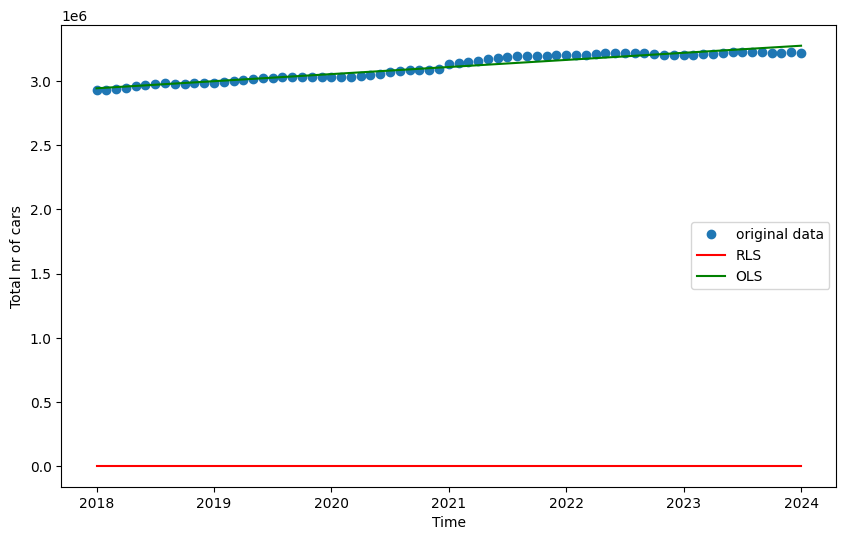

In [14]:
#plot theta ols
plt.figure(figsize=(10, 6))
plt.plot(x[:,1], y, 'o', label='original data')
plt.plot(x[:,1], (x@theta_hat), 'r', label='RLS')
plt.plot(x[:,1], (x@theta_ols), 'g', label='OLS')
plt.xlabel('Time')
plt.ylabel('Total nr of cars')
plt.legend()
plt.show()


**Forgetting** Lambda

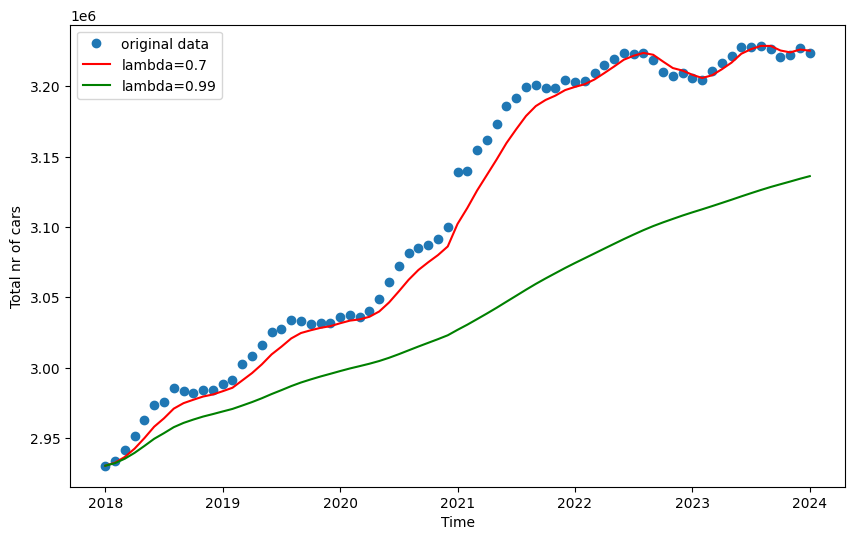

In [15]:
#write recursive least squares algorithm, for updating R_t and theta_t


T = len(train)

lambdas = [0.7, 0.99]

y_results = []

for lambda_ in lambdas:
    
    theta_hat = np.zeros((2,1))
    R = np.eye(2)*0.1

    y_pred = []
    
    for t in range(T):
        x_t = x[t].reshape(-1, 1)  # Feature vector at time t
        y_t = y[t]  # Output at time t
        
        # Kalman gain: K_t = R * x_t / (lambda + x_t.T * R * x_t)
        K_t = R @ x_t / (lambda_ + x_t.T @ R @ x_t)
        
        # Update theta_hat (parameter estimate)
        theta_hat = theta_hat + K_t * (y_t - x_t.T @ theta_hat)
        
        # Update the inverse of covariance matrix (R)
        R = (1 / lambda_) * (R - K_t @ x_t.T @ R)
        
        # Predict output for time t
        y_pred.append((x_t.T @ theta_hat).item())
    y_results.append(y_pred)
    

warmup_period = 0

plt.figure(figsize=(10, 6))
plt.plot(train['time'], y, 'o', label='original data')
plt.plot(train['time'][warmup_period:], y_results[0][warmup_period:], 'r', label='lambda=0.7')
plt.plot(train['time'][warmup_period:], y_results[1][warmup_period:], 'g', label='lambda=0.99')
plt.xlabel('Time')
plt.ylabel('Total nr of cars')
plt.legend()

plt.show()

# One step predictions